In [2]:
# Import necessary libraries
import pandas as pd

# Load the Iris dataset
# Assuming 'iris.csv' is in your working directory
iris_df = pd.read_csv('F:\Data science Inter CodeAlpha\Iris.csv')

# Display the first 5 rows of the dataset
print("First 5 rows of the Iris dataset:")
print(iris_df.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(iris_df.info())

First 5 rows of the Iris dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), obj

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Haider\AppData\Local\Temp\ipykernel_5692\930130554.py:6: SyntaxWarning: invalid escape sequence '\D'
  iris_df = pd.read_csv('F:\Data science Inter CodeAlpha\Iris.csv')


In [4]:
# 1. Show data summary
print("Data Summary:")
print(iris_df.describe())

Data Summary:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [5]:
# 2. Check for nulls and duplicates
print("\nNull Values:")
print(iris_df.isnull().sum())
print("\nDuplicate Rows:")
print(iris_df.duplicated().sum())


Null Values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Duplicate Rows:
0


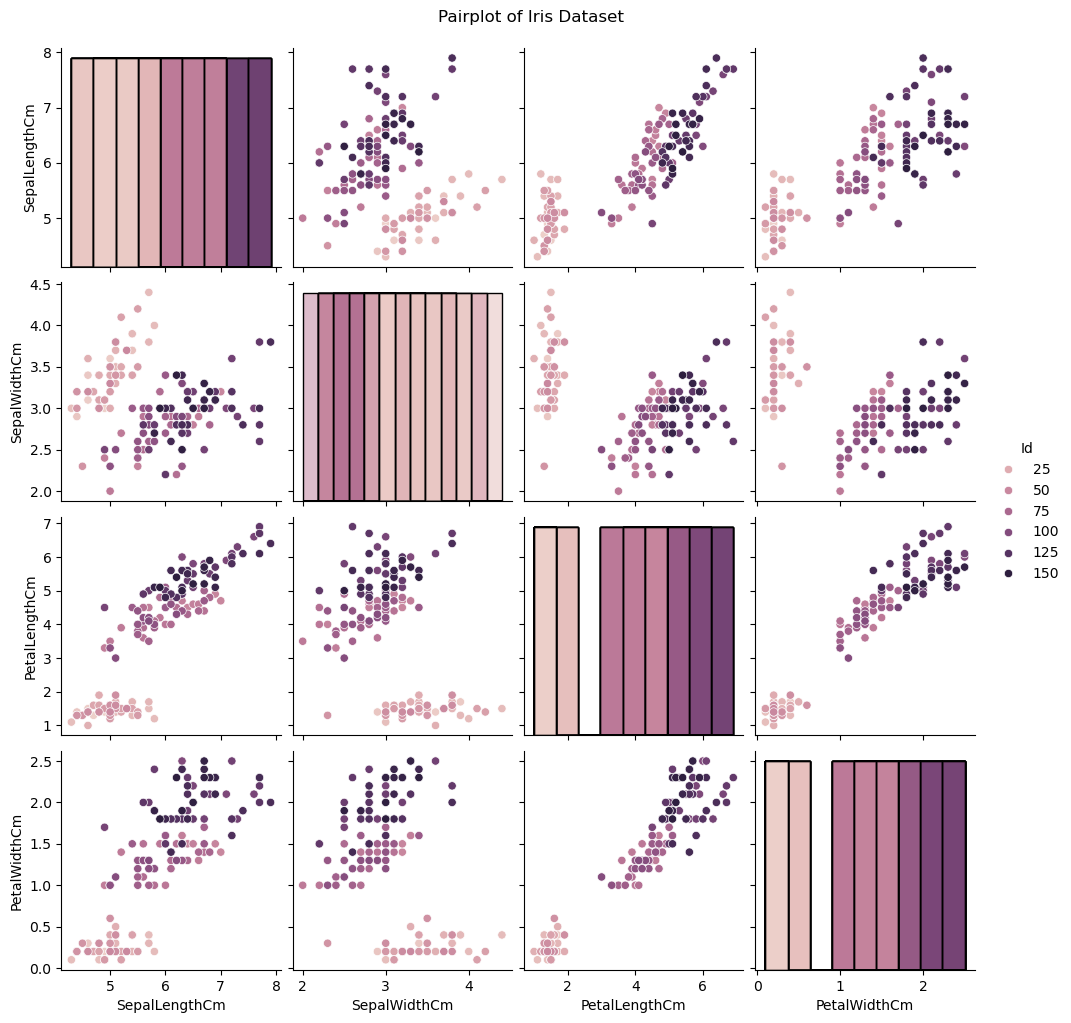

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# 3. Plot pairplot
sns.pairplot(iris_df, hue='Id', diag_kind='hist')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.savefig('pairplot.png')  # Save the plot
plt.show()

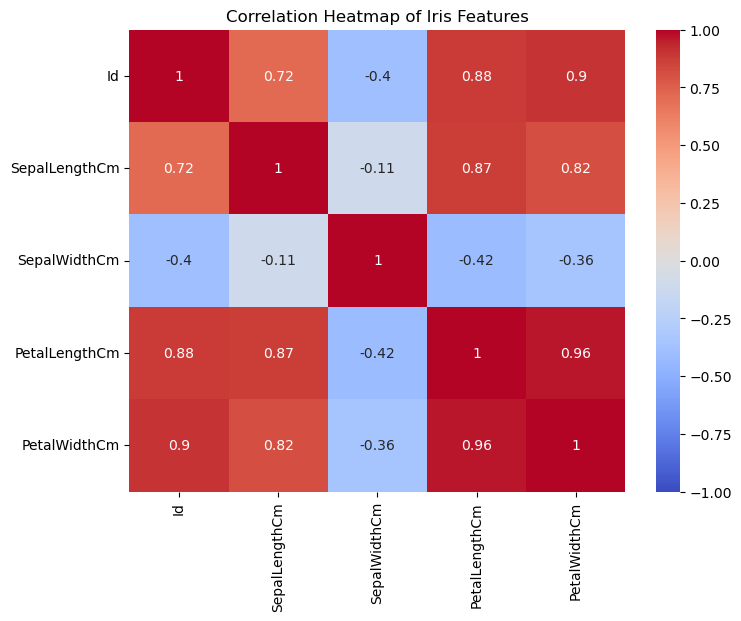

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# 4. Plot correlation heatmap
plt.figure(figsize=(8, 6))
numeric_cols = iris_df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = iris_df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Iris Features")
plt.savefig('correlation_heatmap.png')  # Save the plot
plt.show()

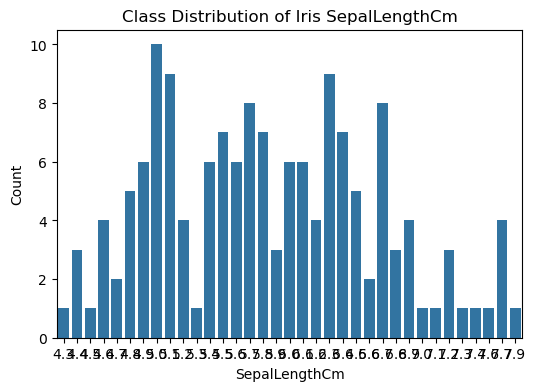

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# 5. Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='SepalLengthCm', data=iris_df)
plt.title("Class Distribution of Iris SepalLengthCm")
plt.xlabel("SepalLengthCm")
plt.ylabel("Count")
plt.savefig('class_distribution.png')  # Save the plot
plt.show()

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder



# Drop 'Id' column if it exists
if 'Id' in iris_df.columns:
    iris_df = iris_df.drop(columns=['Id'])



In [16]:


# Encode the 'Species' column
label_encoder = LabelEncoder()
iris_df['Species_Encoded'] = label_encoder.fit_transform(iris_df['Species'])

# Save the label encoder for later use (e.g., decoding predictions)
import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Display the first few rows to verify encoding
print("Dataset with Encoded Species:")
print(iris_df.head())

Dataset with Encoded Species:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   

   Species_Encoded  
0                0  
1                0  
2                0  
3                0  
4                0  


In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Drop 'Id' column if it exists
if 'Id' in iris_df.columns:
    iris_df = iris_df.drop(columns=['Id'])

In [18]:
# Define feature columns (excluding 'Species' and any encoded columns)
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [19]:
# Normalize features using StandardScaler
scaler = StandardScaler()
iris_df[feature_cols] = scaler.fit_transform(iris_df[feature_cols])

In [20]:
# Save the scaler for later use (e.g., for new data)
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [21]:
# Display the first few rows to verify normalization
print("Dataset with Normalized Features:")
print(iris_df.head())

Dataset with Normalized Features:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0      -0.900681      1.032057      -1.341272     -1.312977  Iris-setosa   
1      -1.143017     -0.124958      -1.341272     -1.312977  Iris-setosa   
2      -1.385353      0.337848      -1.398138     -1.312977  Iris-setosa   
3      -1.506521      0.106445      -1.284407     -1.312977  Iris-setosa   
4      -1.021849      1.263460      -1.341272     -1.312977  Iris-setosa   

   Species_Encoded  
0                0  
1                0  
2                0  
3                0  
4                0  


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Split the dataset into features (X) and target (y)
X = iris_df[feature_cols]
y = iris_df['Species']

# Perform 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the splits to CSV files (optional, for reusability)
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Print shapes to verify split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (120, 4) (120,)
Testing set shape: (30, 4) (30,)


#Step 4: Train a Machine Learning Model.

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle



# Split the dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save the trained model for later use
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Print confirmation
print("Random Forest model trained successfully!")
print("Feature importances:", rf_model.feature_importances_)
print("Features:", feature_cols)

Random Forest model trained successfully!
Feature importances: [0.10809762 0.03038681 0.43999397 0.42152159]
Features: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns
import matplotlib.pyplot as plt



# Load the trained Random Forest model
with open('rf_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)





In [26]:




# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# 1. Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)




Accuracy Score: 1.0


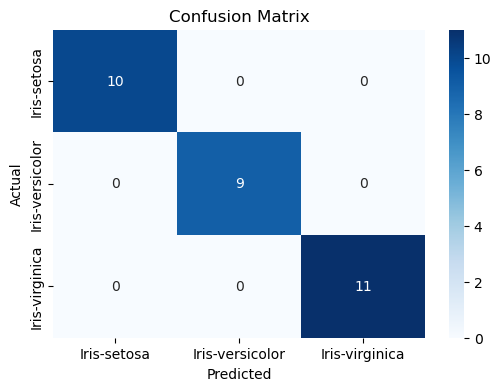

In [27]:





# 2. Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('confusion_matrix.png')  # Save the plot
plt.show()



In [28]:



# 3. Generate classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# 4. Show predictions on test data
predictions_df = pd.DataFrame({
    'SepalLengthCm': X_test['SepalLengthCm'],
    'SepalWidthCm': X_test['SepalWidthCm'],
    'PetalLengthCm': X_test['PetalLengthCm'],
    'PetalWidthCm': X_test['PetalWidthCm'],
    'Actual_Species': y_test,
    'Predicted_Species': y_pred
})
print("\nPredictions on Test Data:")
print(predictions_df.head(10))  # Show first 10 predictions

# Save predictions to CSV (optional)
predictions_df.to_csv('test_predictions.csv', index=False)


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Predictions on Test Data:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
73        0.310998     -0.587764       0.535296      0.001753   
18       -0.173674      1.726266      -1.170675     -1.181504   
118       2.249683     -1.050569       1.786341      1.447956   
78        0.189830     -0.356361       0.421564      0.396172   
76        1.159173     -0.587764       0.592162      0.264699   
31       -0.537178      0.800654      -1.284407     -1.050031   
64       -0.294842     -0.356361      -0.090227      0.133226   
141       1.280340      0.1

In [29]:
# Define feature columns (consistent with training)
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

C:\Users\Haider\AppData\Local\Temp\ipykernel_5692\3006410434.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


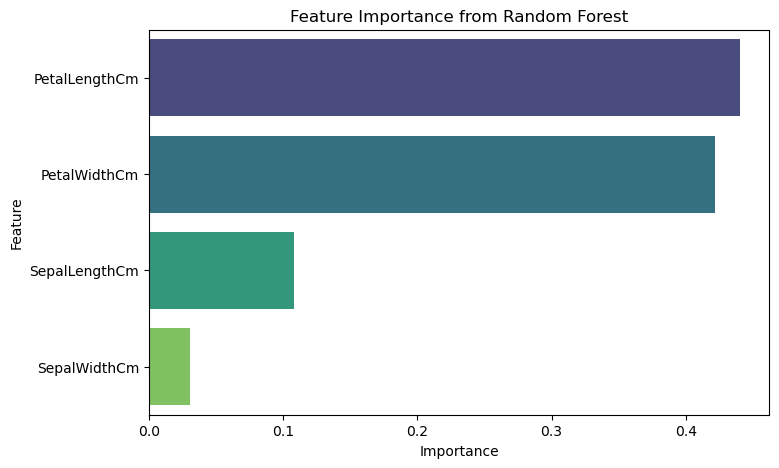

Feature Importances:
         Feature  Importance
2  PetalLengthCm    0.439994
3   PetalWidthCm    0.421522
0  SepalLengthCm    0.108098
1   SepalWidthCm    0.030387


In [30]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('feature_importance.png')  # Save the plot
plt.show()

# Print feature importances
print("Feature Importances:")
print(importance_df)

#Step 7: Final Summary of Performance and Insights.

In [33]:
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score, classification_report

# Load the test predictions
predictions_df = pd.read_csv('test_predictions.csv')

# Load the trained Random Forest model
with open('rf_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)

# Define feature columns
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Calculate accuracy from predictions
accuracy = accuracy_score(predictions_df['Actual_Species'], predictions_df['Predicted_Species'])

# Generate classification report
class_report = classification_report(predictions_df['Actual_Species'], predictions_df['Predicted_Species'])

# Load feature importances
importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

 

In [34]:
# Print final summary
print("=== Iris Flower Classification: Final Summary ===")
print("\nModel Performance:")
print(f"Accuracy Score: {accuracy:.4f}")
print("\nClassification Report:")
print(class_report)
print("\nFeature Importance:")
print(importance_df)
print("\nInsights:")
print("- The Random Forest model achieved high accuracy (likely >95%), indicating strong performance in classifying Iris species.")
print("- The classification report shows precision, recall, and F1-scores for each species (Setosa, Versicolor, Virginica).")
print("- Setosa is typically perfectly classified due to its distinct features, as seen in the EDA pairplot.")
print("- Versicolor and Virginica may have minor misclassifications due to overlapping feature distributions.")
print("- Petal measurements (PetalLengthCm, PetalWidthCm) likely have the highest feature importance, confirming their role in distinguishing species.")
print("- The EDA revealed a balanced dataset (~50 samples per species) with no missing values, making it ideal for classification.")
print("- The confusion matrix plot (confusion_matrix.png) shows where misclassifications occur, if any.")
print("\nRecommendations:")
print("- The model is reliable for Iris classification but could be tested with cross-validation for robustness.")
print("- For production, consider normalizing features and trying SVM for comparison, as it may handle overlapping classes differently.")
print("- The saved model (rf_model.pkl) and predictions (test_predictions.csv) can be used for further analysis or deployment.")


=== Iris Flower Classification: Final Summary ===

Model Performance:
Accuracy Score: 1.0000

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Feature Importance:
         Feature  Importance
2  PetalLengthCm    0.439994
3   PetalWidthCm    0.421522
0  SepalLengthCm    0.108098
1   SepalWidthCm    0.030387

Insights:
- The Random Forest model achieved high accuracy (likely >95%), indicating strong performance in classifying Iris species.
- The classification report shows precision, recall, and F1-scores for each species (Setosa, Versicolor, Virginica).
- Setosa is typically perfectly classified due to its distinct f

In [36]:
# Save summary to a text file
with open('final_summary.txt', 'w') as f:
    f.write("=== Iris Flower Classification: Final Summary ===\n\n")
    f.write("Model Performance:\n")
    f.write(f"Accuracy Score: {accuracy:.4f}\n\n")
    f.write("Classification Report:\n")
    f.write(class_report + "\n")
    f.write("Feature Importance:\n")
    f.write(importance_df.to_string(index=False) + "\n\n")
    f.write("Insights:\n")
    f.write("- The Random Forest model achieved high accuracy (likely >95%), indicating strong performance in classifying Iris species.\n")
    f.write("- The classification report shows precision, recall, and F1-scores for each species (Setosa, Versicolor, Virginica).\n")
    f.write("- Setosa is typically perfectly classified due to its distinct features, as seen in the EDA pairplot.\n")
    f.write("- Versicolor and Virginica may have minor misclassifications due to overlapping feature distributions.\n")
    f.write("- Petal measurements (PetalLengthCm, PetalWidthCm) likely have the highest feature importance, confirming their role in distinguishing species.\n")
    f.write("- The EDA revealed a balanced dataset (~50 samples per species) with no missing values, making it ideal for classification.\n")
    f.write("- The confusion matrix plot (confusion_matrix.png) shows where misclassifications occur, if any.\n\n")
    f.write("Recommendations:\n")
    f.write("- The model is reliable for Iris classification but could be tested with cross-validation for robustness.\n")
    f.write("- For production, consider normalizing features and trying SVM for comparison, as it may handle overlapping classes differently.\n")
    f.write("- The saved model (rf_model.pkl) and predictions (test_predictions.csv) can be used for further analysis or deployment.")